<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Overview of the Status of Various Counties in New Jersey**

My primary objective is to make data based recommendations for people visiting the United States, and particularly New Jersey on the counties that effectively meet their diverse needs. According to the American immigration Council, nearly 1 in 4 New Jersey residents is an immigrant. People migrate into New jersey for different reasons such as residence, education, tourism, business, among others. However there are certain factors that influence the choice of the county or city to settle. Some include transport, race, life expectancy, employment opportunities access to healthcare among other critical factors.

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

'2010 Annual Average Labor Force Estimates in NJ.xlsx'	 Hospitals_in_NJ.dbf
'2022 Annual Labor Force Estimates in NJ.xlsx'		 Hospitals_in_NJ.prj
'Additional Measure Data.xlsx'				 Hospitals_in_NJ.shp
 Colleges_and_Universities_in_NJ.cpg			 Hospitals_in_NJ.shx
 Colleges_and_Universities_in_NJ.dbf			 Hospitals_in_NJ.xml
 Colleges_and_Universities_in_NJ.prj			'New Jersey Population.xlsx'
 Colleges_and_Universities_in_NJ.shp			 new-jersey-schools.cpg
 Colleges_and_Universities_in_NJ.shx			 new-jersey-schools.dbf
 Colleges_and_Universities_in_NJ.xml			 new-jersey-schools.prj
 coll_univ.zip						 new-jersey-schools.shp
 County_Boundaries_of_NJ.cpg				 new-jersey-schools.shx
 County_Boundaries_of_NJ.dbf				 new-jersey-schools.txt
 County_Boundaries_of_NJ.geojson			 new_jersey_schools.zip
 County_Boundaries_of_NJ.geojson.1			 nj_counties.zip
 County_Boundaries_of_NJ.prj				 nj_geojson_data.json
 County_Boundaries_of_NJ.shp				 nj_hosp.zip
 County_Boundaries_of_NJ.shx				 sample_data
 County_Bo

<Axes: >

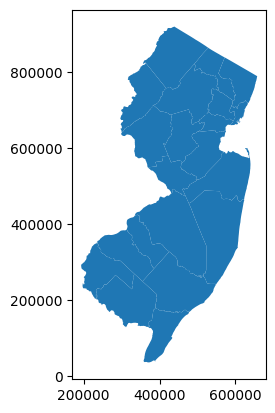

In [ ]:
! wget -q -O nj_counties.zip https://github.com/Brian13Noble/GIS/raw/main/County_Boundaries_of_N.zip
!ls
zip_ref = zipfile.ZipFile('/content/nj_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_counties=gpd.read_file('/content/County_Boundaries_of_NJ.shp') #load the shapefile with gpd as nj_counties

#Make the map
nj_counties.plot()

In [ ]:
file_path = '/content/Additional Measure Data.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
    !wget -q https://github.com/Brian13Noble/GIS/raw/main/Additional%20Measure%20Data.xlsx

# Now read the Excel file into a DataFrame
add_measures = pd.read_excel(file_path, skiprows=1)

In [ ]:
drop_columns = ['Life Expectancy (AIAN)', 'Life Expectancy (AIAN) 95% CI - Low', 'Life Expectancy (AIAN) 95% CI - High']
add_measures = add_measures.drop(columns = drop_columns)

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
add_measures.drop(0, inplace=True)

In [ ]:
add_measures= add_measures[['County','Life Expectancy','Life Expectancy (Asian)',
'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 'Life Expectancy (White)', '# Deaths']]
add_measures= add_measures.iloc[0:,:]
add_measures['County'] = add_measures['County'].str.upper()
add_measures

County  Life Expectancy  Life Expectancy (Asian)  \
1     ATLANTIC             76.7                     89.6   
2       BERGEN             82.1                     89.6   
3   BURLINGTON             79.1                     87.3   
4       CAMDEN             76.7                     89.5   
5     CAPE MAY             76.9                      NaN   
6   CUMBERLAND             74.6                     81.8   
7        ESSEX             78.0                     89.1   
8   GLOUCESTER             77.2                     88.1   
9       HUDSON             80.5                     88.5   
10   HUNTERDON             83.2                     84.8   
11      MERCER             79.3                     88.3   
12   MIDDLESEX             80.6                     88.2   
13    MONMOUTH             79.8                     88.0   
14      MORRIS             81.8                     89.8   
15       OCEAN             78.5                     90.1   
16     PASSAIC             78.9                     85.6   
17       SALEM             74.0                      NaN   
18    SOMERSET             81.9                     90.1   
19      SUSSEX             78.8                     89.8   
20       UNION             79.8                     88.6   
21      WARREN             79.1                     88.0   

    Life Expectancy (Black)  Life Expectancy (Hispanic)  \
1                      71.4                        80.9   
2                      78.7                        84.9   
3                      76.8                        84.3   
4                      72.2                        79.3   
5                      72.2                        88.5   
6                      71.5                        77.2   
7                      73.5                        81.8   
8                      74.0                        84.4   
9                      73.9                        82.9   
10                     89.2                        84.9   
11                     73.2                        81.6   
12                     78.5                        83.0   
13                     74.3                        82.0   
14                     76.9                        85.8   
15                     74.9                        83.3   
16                     71.9                        82.5   
17                     66.8                        79.0   
18                     77.6                        85.8   
19                     73.2                        82.0   
20                     75.8                        82.8   
21                     76.6                        84.5   

    Life Expectancy (White)  # Deaths  
1                      76.6      4148  
2                      81.2      7666  
3                      79.0      5362  
4                      77.2      7316  
5                      76.9      1656  
6                      74.6      2549  
7                      81.3     10371  
8                      77.1      3900  
9                      78.5      6617  
10                     83.1      1102  
11                     80.2      4309  
12                     78.6      8040  
13                     79.8      6856  
14                     81.3      4146  
15                     78.3      8117  
16                     78.9      5792  
17                     75.3      1209  
18                     81.1      2695  
19                     78.5      1866  
20                     80.4      5938  
21                     78.8      1338

In [ ]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=add_measures,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

In [ ]:
nj_counties[['COUNTY','County','_merge']]

COUNTY      County _merge
0     ATLANTIC    ATLANTIC   both
1       BERGEN      BERGEN   both
2   BURLINGTON  BURLINGTON   both
3       CAMDEN      CAMDEN   both
4     CAPE MAY    CAPE MAY   both
5   CUMBERLAND  CUMBERLAND   both
6        ESSEX       ESSEX   both
7   GLOUCESTER  GLOUCESTER   both
8       HUDSON      HUDSON   both
9    HUNTERDON   HUNTERDON   both
10      MERCER      MERCER   both
11    MONMOUTH    MONMOUTH   both
12       OCEAN       OCEAN   both
13     PASSAIC     PASSAIC   both
14       SALEM       SALEM   both
15    SOMERSET    SOMERSET   both
16      SUSSEX      SUSSEX   both
17       UNION       UNION   both
18      WARREN      WARREN   both
19      MORRIS      MORRIS   both
20   MIDDLESEX   MIDDLESEX   both

In [ ]:
! wget -q -O nj_hosp.zip https://github.com/Brian13Noble/GIS/raw/main/Hospitals_in_NJ.zip
!ls
zip_ref = zipfile.ZipFile('/content/nj_hosp.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_hosp=gpd.read_file('/content/Hospitals_in_NJ.shp') #load the shapefile with gpd


'2010 Annual Average Labor Force Estimates in NJ.xlsx'	 Hospitals_in_NJ.dbf
'2022 Annual Labor Force Estimates in NJ.xlsx'		 Hospitals_in_NJ.prj
'Additional Measure Data.xlsx'				 Hospitals_in_NJ.shp
 Colleges_and_Universities_in_NJ.cpg			 Hospitals_in_NJ.shx
 Colleges_and_Universities_in_NJ.dbf			 Hospitals_in_NJ.xml
 Colleges_and_Universities_in_NJ.prj			'New Jersey Population.xlsx'
 Colleges_and_Universities_in_NJ.shp			 new-jersey-schools.cpg
 Colleges_and_Universities_in_NJ.shx			 new-jersey-schools.dbf
 Colleges_and_Universities_in_NJ.xml			 new-jersey-schools.prj
 coll_univ.zip						 new-jersey-schools.shp
 County_Boundaries_of_NJ.cpg				 new-jersey-schools.shx
 County_Boundaries_of_NJ.dbf				 new-jersey-schools.txt
 County_Boundaries_of_NJ.geojson			 new_jersey_schools.zip
 County_Boundaries_of_NJ.geojson.1			 nj_counties.zip
 County_Boundaries_of_NJ.prj				 nj_geojson_data.json
 County_Boundaries_of_NJ.shp				 nj_hosp.zip
 County_Boundaries_of_NJ.shx				 sample_data
 County_Bo

# **Exploring the Relationship Between Proximity to Health Facilities and Life Expectancy Across New Jersey Counties**

<Axes: >

Text(446845.6710124223, 234718.67854269317, 'ATLANTIC')

Text(608674.9722902415, 775344.9010707563, 'BERGEN')

Text(445032.1629263677, 380367.81326114654, 'BURLINGTON')

Text(362990.6130646281, 353685.88343532046, 'CAMDEN')

Text(407013.1101655159, 114992.2381988394, 'CAPE MAY')

Text(319542.7506195712, 197359.46040190206, 'CUMBERLAND')

Text(562253.4894993025, 711675.2449586024, 'ESSEX')

Text(311865.8974070625, 322476.6418932246, 'GLOUCESTER')

Text(608428.8356156062, 694107.9908810152, 'HUDSON')

Text(377595.22464250773, 631790.897850177, 'HUNTERDON')

Text(435851.76357316674, 528225.6265984694, 'MERCER')

Text(569736.7056196764, 519774.2489392704, 'MONMOUTH')

Text(553566.9451515895, 382793.6503082593, 'OCEAN')

Text(547109.8753648106, 801736.5245332896, 'PASSAIC')

Text(253014.76795156772, 275761.5670788178, 'SALEM')

Text(459788.9851800551, 630164.5125110017, 'SOMERSET')

Text(439531.57573730504, 839964.9957279859, 'SUSSEX')

Text(545391.285890184, 665430.058250928, 'UNION')

Text(354517.27771581686, 737502.1613603798, 'WARREN')

Text(479789.7234040614, 738913.4075898962, 'MORRIS')

Text(516625.77448491874, 584830.6357102803, 'MIDDLESEX')

Text(0.5, 1.0, 'Hospitals in New Jersey by County')

[]

[]

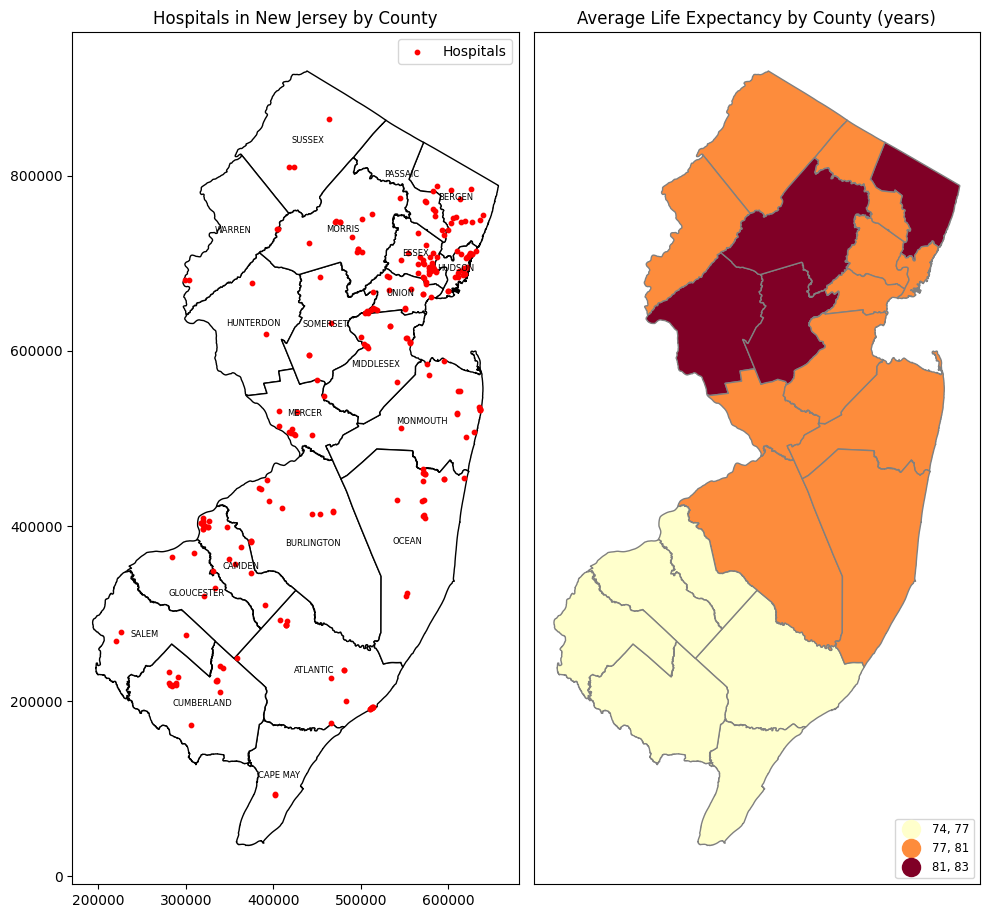

In [ ]:
# Assuming you have a GeoDataFrame for life expectancy named nj_life_expectancy
# Replace 'your_data_here' with your actual data for life expectancy

# Plot New Jersey counties with hospitals
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# First subplot: Hospitals
ax1 = nj_counties.plot(ax=axes[0], color='white', edgecolor='black')
nj_hosp.plot(ax=ax1, color='red', marker='o', markersize=10, label='Hospitals')

for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['COUNTY']):
    ax1.text(x, y, label, fontsize=6, ha='center', va='center')

ax1.set_title('Hospitals in New Jersey by County')
ax1.legend()

# Second subplot: Life Expectancy
ax2 = nj_counties.plot(ax=axes[1], column='Life Expectancy', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=3,
                       edgecolor='grey', linewidth=1,
                       legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
ax2.title.set_text("Average Life Expectancy by County (years)")
ax2.set_xticks([])  # kills xticks
ax2.set_yticks([])  # kills yticks

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



As the maps above indicate, access to healthcare is significantly higher in North Eastern parts of New Jersey, especifically in counties such as Bergen, Hudson, and Essex. Additionally, from ps3, the counties are among the top 5 most populated counties and some of them have the highest life expectancies ranging between 79 and 83 years. On the contrary, the access to healthcare could be one of the significant challenges in north-western counties like Sussex, Warren, and Hunterdon and south-jersey counties like Salem, Cumberland, and Cape May. While there is a correlation between access to healthcare, there could be other factors responsible for low life expectancy, especially among the South-Jersey counties.
Further, there is also interesting observation for counties like Hunterdon, Somerset, and Morris where life expectancy is higher despite having few hospitals. Overall, it is important for visitor to prioritize counties with many hospitals as that could improve chances of getting better care close to the house of residence.



In [ ]:
!wget -q https://github.com/Brian13Noble/GIS/commits/main/County_Boundaries_of_NJ.geojson

In [ ]:
!wget -q -O coll_univ.zip https://github.com/Brian13Noble/GIS/raw/main/Colleges_and_Universities_in_NJ.zip
!ls
zip_ref = zipfile.ZipFile('/content/coll_univ.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
coll_univ=gpd.read_file('/content/Colleges_and_Universities_in_NJ.shp') #load the shapefile with gpd

'2010 Annual Average Labor Force Estimates in NJ.xlsx'	 Hospitals_in_NJ.cpg
'2022 Annual Labor Force Estimates in NJ.xlsx'		 Hospitals_in_NJ.dbf
'Additional Measure Data.xlsx'				 Hospitals_in_NJ.prj
 Colleges_and_Universities_in_NJ.cpg			 Hospitals_in_NJ.shp
 Colleges_and_Universities_in_NJ.dbf			 Hospitals_in_NJ.shx
 Colleges_and_Universities_in_NJ.prj			 Hospitals_in_NJ.xml
 Colleges_and_Universities_in_NJ.shp			'New Jersey Population.xlsx'
 Colleges_and_Universities_in_NJ.shx			 new-jersey-schools.cpg
 Colleges_and_Universities_in_NJ.xml			 new-jersey-schools.dbf
 coll_univ.zip						 new-jersey-schools.prj
 County_Boundaries_of_NJ.cpg				 new-jersey-schools.shp
 County_Boundaries_of_NJ.dbf				 new-jersey-schools.shx
 County_Boundaries_of_NJ.geojson			 new-jersey-schools.txt
 County_Boundaries_of_NJ.geojson.1			 new_jersey_schools.zip
 County_Boundaries_of_NJ.geojson.2			 nj_counties.zip
 County_Boundaries_of_NJ.prj				 nj_geojson_data.json
 County_Boundaries_of_NJ.shp				 nj_hosp.z

# **Distribution of Colleges and universities in New Jersey**

In [ ]:
# Plot New Jersey counties
ax = nj_counties.plot(color='white', edgecolor='black', figsize=(6, 10))

# Plot college and university points on top of counties
coll_univ.plot(ax=ax, color='red', marker='o', markersize=20, label='Colleges/Universities')

# Annotate county names
for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['COUNTY']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Set plot title and show the plot
plt.title('Colleges and Universities in New Jersey')
plt.legend()  # Add this line to display the legend
plt.show()



<Axes: >

Text(446845.6710124223, 234718.67854269317, 'ATLANTIC')

Text(608674.9722902415, 775344.9010707563, 'BERGEN')

Text(445032.1629263677, 380367.81326114654, 'BURLINGTON')

Text(362990.6130646281, 353685.88343532046, 'CAMDEN')

Text(407013.1101655159, 114992.2381988394, 'CAPE MAY')

Text(319542.7506195712, 197359.46040190206, 'CUMBERLAND')

Text(562253.4894993025, 711675.2449586024, 'ESSEX')

Text(311865.8974070625, 322476.6418932246, 'GLOUCESTER')

Text(608428.8356156062, 694107.9908810152, 'HUDSON')

Text(377595.22464250773, 631790.897850177, 'HUNTERDON')

Text(435851.76357316674, 528225.6265984694, 'MERCER')

Text(569736.7056196764, 519774.2489392704, 'MONMOUTH')

Text(553566.9451515895, 382793.6503082593, 'OCEAN')

Text(547109.8753648106, 801736.5245332896, 'PASSAIC')

Text(253014.76795156772, 275761.5670788178, 'SALEM')

Text(459788.9851800551, 630164.5125110017, 'SOMERSET')

Text(439531.57573730504, 839964.9957279859, 'SUSSEX')

Text(545391.285890184, 665430.058250928, 'UNION')

Text(354517.27771581686, 737502.1613603798, 'WARREN')

Text(479789.7234040614, 738913.4075898962, 'MORRIS')

Text(516625.77448491874, 584830.6357102803, 'MIDDLESEX')

Text(0.5, 1.0, 'Colleges and Universities in New Jersey')

<ipython-input-100-b814b6f23a47>:13: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



Pursuing higher education is one of the primary reasons why people relocate to New Jersey. The map indicates that many colleges and universites are located in the Northern Jersey counties like Essex, Bergen, Morris, and Middlesex. Similarly one can expect such counties to have more employment opportunities,efficient transport systems, and better quality of life compared to South-Jersey counties where there are very few colleges and universities.

In [ ]:
import os
import pandas as pd

file_path = '/content/Suspected Drug Related Deaths in NJ.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/Suspected%20Drug%20Related%20Deaths%20in%20NJ.xlsx

# Now read the Excel file into a DataFrame
drug_deaths = pd.read_excel(file_path)



In [ ]:
drug_deaths['County'] = drug_deaths['County'].str.upper()

In [ ]:
drug_deaths

County  Deaths(Count)
0     ATLANTIC            124
1       BERGEN             92
2   BURLINGTON             93
3       CAMDEN            228
4     CAPE MAY             25
5   CUMBERLAND             52
6        ESSEX            312
7   GLOUCESTER             55
8       HUDSON            134
9    HUNTERDON              8
10      MERCER             77
11   MIDDLESEX            107
12    MONMOUTH             92
13      MORRIS             44
14       OCEAN            114
15     PASSAIC             96
16       SALEM             16
17    SOMERSET             21
18      SUSSEX             20
19       UNION             62
20      WARREN             18
21      TOTAL:           1790

In [ ]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=drug_deaths,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

# Suspected Drug Related Deaths by County

<Axes: >

[]

[]

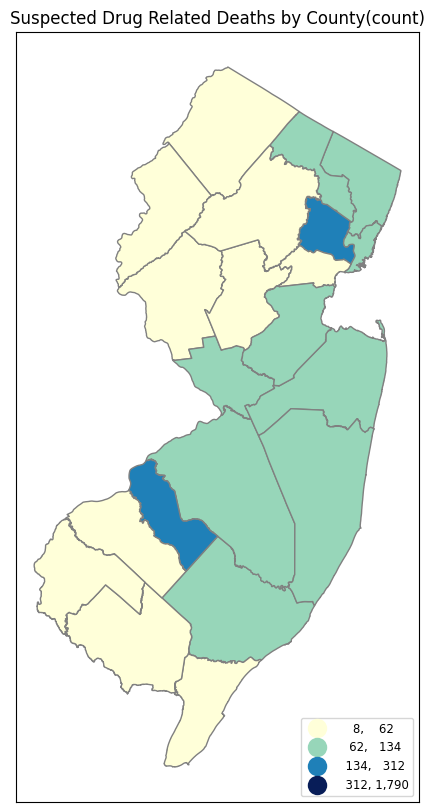

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
nj_counties.plot(ax=ax,column='Deaths(Count)',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Suspected Drug Related Deaths by County(count)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

The map above represents the number of people suspected to have died from drug and substance overdose between 01/01/2023 and 31st August 2023 as reported by the NJ department of Law and Public Safety. Drug and sustance overdose is one of the major problems facing the residents of New jersey. Generally, drug and substance overdose are strongly related with crime and violence. From the above statistics, Camden and Essex are counties with the highest number of suspected deaths associated with drug and substance overdose.That could indicate that drug and substance overdose is a major problem in such counties and therefore one could consider such a factor before planning to settle in such counties.

In [ ]:

file_path = '/content/2010 Annual Average Labor Force Estimates in NJ.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/2010%20Annual%20Average%20Labor%20Force%20Estimates%20in%20NJ.xlsx

# Now read the Excel file into a DataFrame
unemployment1 = pd.read_excel(file_path, skiprows=2)


In [ ]:
unemployment1['County'] = unemployment1['County'].str.upper()

In [ ]:
unemployment1=unemployment1.dropna()

In [ ]:
unemployment1

County  Labor Force  Employment  Unemployment  Unemployment Rate (%)
0     ATLANTIC     140527.0    122988.0       17539.0                   12.5
1       BERGEN     480364.0    441308.0       39056.0                    8.1
2   BURLINGTON     236893.0    215253.0       21640.0                    9.1
3       CAMDEN     264642.0    235220.0       29422.0                   11.1
4     CAPE MAY      50222.0     43082.0        7140.0                   14.2
5   CUMBERLAND      72646.0     63067.0        9579.0                   13.2
6        ESSEX     382784.0    340655.0       42129.0                   11.0
7   GLOUCESTER     152479.0    136584.0       15895.0                   10.4
8       HUDSON     354023.0    319751.0       34272.0                    9.7
9    HUNTERDON      68375.0     63243.0        5132.0                    7.5
10      MERCER     193388.0    177008.0       16380.0                    8.5
11   MIDDLESEX     423623.0    385060.0       38563.0                    9.1
12    MONMOUTH     329770.0    300440.0       29330.0                    8.9
13      MORRIS     265152.0    245208.0       19944.0                    7.5
14       OCEAN     264164.0    236591.0       27573.0                   10.4
15     PASSAIC     254268.0    225034.0       29234.0                   11.5
16       SALEM      32156.0     28352.0        3804.0                   11.8
17    SOMERSET     173689.0    160303.0       13386.0                    7.7
18      SUSSEX      82375.0     74496.0        7879.0                    9.6
19       UNION     279607.0    252569.0       27038.0                    9.7
20      WARREN      58636.0     52774.0        5862.0                   10.0
22  NEW JERSEY    4559778.0   4118982.0      440796.0                    9.7

In [ ]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=unemployment1,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

In [ ]:
nj_counties[['COUNTY','County','_merge']]

COUNTY      County      _merge
0     ATLANTIC    ATLANTIC        both
1       BERGEN      BERGEN        both
2   BURLINGTON  BURLINGTON        both
3       CAMDEN      CAMDEN        both
4     CAPE MAY    CAPE MAY        both
5   CUMBERLAND  CUMBERLAND        both
6        ESSEX       ESSEX        both
7   GLOUCESTER  GLOUCESTER        both
8       HUDSON      HUDSON        both
9    HUNTERDON   HUNTERDON        both
10      MERCER      MERCER        both
11    MONMOUTH    MONMOUTH        both
12       OCEAN       OCEAN        both
13     PASSAIC     PASSAIC        both
14       SALEM       SALEM        both
15    SOMERSET    SOMERSET        both
16      SUSSEX      SUSSEX        both
17       UNION       UNION        both
18      WARREN      WARREN        both
19      MORRIS      MORRIS        both
20   MIDDLESEX   MIDDLESEX        both
21         NaN         NaN   left_only
22         NaN  NEW JERSEY  right_only

In [ ]:
#nj_counties.dtypes

In [ ]:
file_path = '/content/2022 Annual Labor Force Estimates in NJ.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/2022%20Annual%20Labor%20Force%20Estimates%20in%20NJ.xlsx

# Now read the Excel file into a DataFrame
unemployment2 = pd.read_excel(file_path, skiprows=2)

In [ ]:
unemployment2['County'] = unemployment2['County'].str.upper()

In [ ]:
unemployment2=unemployment2.dropna()

In [ ]:
unemployment2.rename(columns={'Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

In [ ]:
unemployment2.rename(columns={'Unemployment': 'Unemployment(2022)'}, inplace=True)

In [ ]:
unemployment2


County  Labor Force  Employment  Unemployment(2022)  Unemployment Rate
0     ATLANTIC     122846.0    116536.0              6310.0                5.1
1       BERGEN     504149.0    487246.0             16903.0                3.4
2   BURLINGTON     247859.0    239613.0              8246.0                3.3
3       CAMDEN     270737.0    259883.0             10854.0                4.0
4     CAPE MAY      47294.0     44225.0              3069.0                6.5
5   CUMBERLAND      69282.0     65773.0              3509.0                5.1
6        ESSEX     388106.0    370619.0             17487.0                4.5
7   GLOUCESTER     161341.0    155427.0              5914.0                3.7
8       HUDSON     377212.0    363531.0             13681.0                3.6
9    HUNTERDON      68083.0     66102.0              1981.0                2.9
10      MERCER     216475.0    209584.0              6891.0                3.2
11   MIDDLESEX     462728.0    447235.0             15493.0                3.3
12    MONMOUTH     347991.0    336497.0             11494.0                3.3
13      MORRIS     268713.0    260558.0              8155.0                3.0
14       OCEAN     298372.0    287322.0             11050.0                3.7
15     PASSAIC     252876.0    241305.0             11571.0                4.6
16       SALEM      30578.0     29170.0              1408.0                4.6
17    SOMERSET     179242.0    173670.0              5572.0                3.1
18      SUSSEX      77612.0     74747.0              2865.0                3.7
19       UNION     289390.0    278184.0             11206.0                3.9
20      WARREN      58921.0     56887.0              2034.0                3.5
22  NEW JERSEY    4739804.0   4564113.0            175691.0                3.7

In [ ]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=unemployment2,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

<ipython-input-119-e49142d8d6cd>:6: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'County_x'} in the result is deprecated and will raise a MergeError in a future version.



# Change in Unemployment Rate in New Jersey Between 2010 and 2022

Text(0.5, 1.0, 'Unemployment Rate in 2010 by County (%)')

[]

[]

Text(0.5, 1.0, 'Unemployment Rate in 2022 by County (%)')

[]

[]

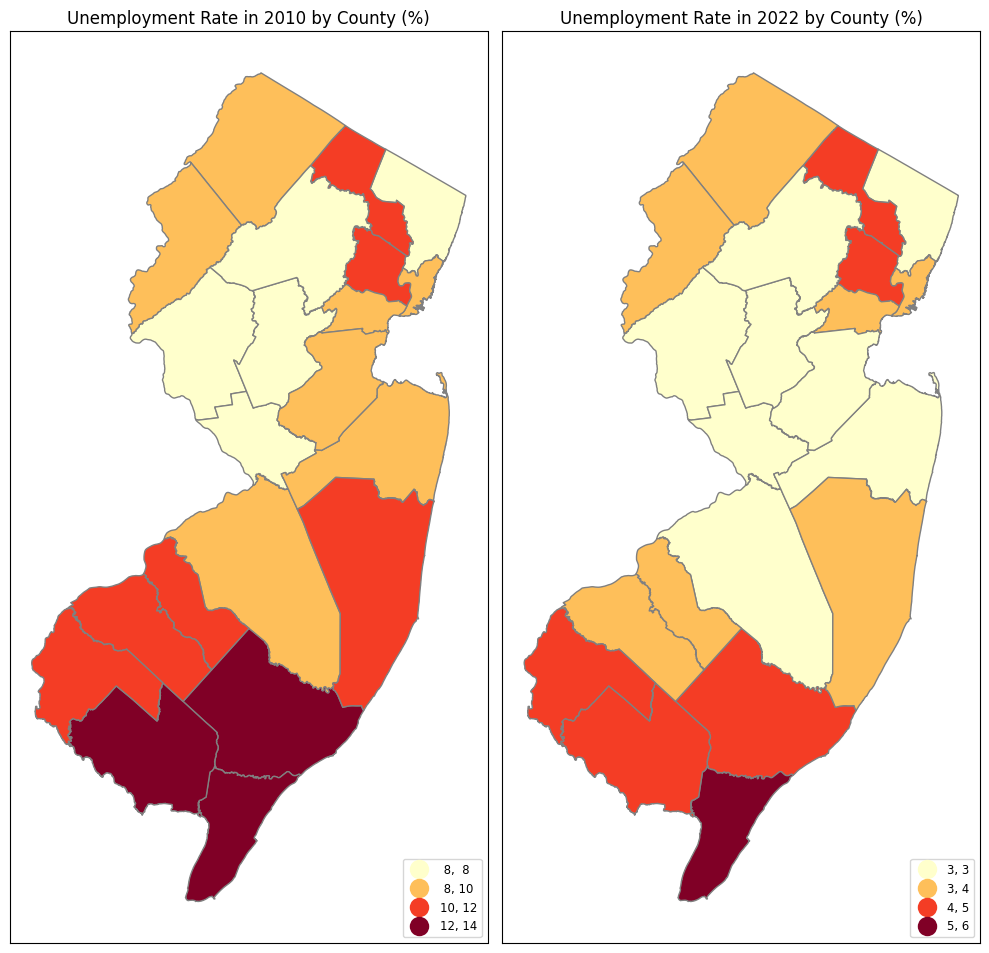

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame for life expectancy named nj_life_expectancy
# Replace 'your_data_here' with your actual data for life expectancy

# Plot New Jersey counties with hospitals
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# First subplot: Unemployment Rate
ax1 = nj_counties.plot(ax=axes[0], column='Unemployment Rate (%)', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=4,
                       edgecolor='grey', linewidth=1,
                       legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
ax1.set_title("Unemployment Rate in 2010 by County (%)")
ax1.set_xticks([])  # kills xticks
ax1.set_yticks([])  # kills yticks

# Second subplot: Life Expectancy
ax2 = nj_counties.plot(ax=axes[1], column='Unemployment Rate', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=4,
                       edgecolor='grey', linewidth=1,
                       legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
ax2.set_title("Unemployment Rate in 2022 by County (%)")
ax2.set_xticks([])  # kills xticks
ax2.set_yticks([])  # kills yticks

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Between 2010 and 2022, there has been an overall decline in unemployment from 14% to 6%. However, unemployment rate is still high in counties like Cape May, Cumberland, Salem, Essex, and Passaic. Therefore, one would reasonably consider counties with the lowest unemployment rates like Burlington, Somerset, Middlesex and Hunterdon as that would increase chances of getting better paying jobs and living a better quality life.   

In [ ]:
!wget -q -O new_jersey_schools.zip https://github.com/Brian13Noble/GIS/raw/main/kx-new-jersey-schools-SHP.zip

!ls
zip_ref = zipfile.ZipFile('/content/new_jersey_schools.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
new_jersey_schools=gpd.read_file('/content/new-jersey-schools.shp') #load the shapefile with gpd

'2010 Annual Average Labor Force Estimates in NJ.xlsx'	 Hospitals_in_NJ.cpg
'2022 Annual Labor Force Estimates in NJ.xlsx'		 Hospitals_in_NJ.dbf
'Additional Measure Data.xlsx'				 Hospitals_in_NJ.prj
 Colleges_and_Universities_in_NJ.cpg			 Hospitals_in_NJ.shp
 Colleges_and_Universities_in_NJ.dbf			 Hospitals_in_NJ.shx
 Colleges_and_Universities_in_NJ.prj			 Hospitals_in_NJ.xml
 Colleges_and_Universities_in_NJ.shp			'New Jersey Population.xlsx'
 Colleges_and_Universities_in_NJ.shx			 new-jersey-schools.cpg
 Colleges_and_Universities_in_NJ.xml			 new-jersey-schools.dbf
 coll_univ.zip						 new-jersey-schools.prj
 County_Boundaries_of_NJ.cpg				 new-jersey-schools.shp
 County_Boundaries_of_NJ.dbf				 new-jersey-schools.shx
 County_Boundaries_of_NJ.geojson			 new-jersey-schools.txt
 County_Boundaries_of_NJ.geojson.1			 new_jersey_schools.zip
 County_Boundaries_of_NJ.geojson.2			 nj_counties.zip
 County_Boundaries_of_NJ.prj				 nj_geojson_data.json
 County_Boundaries_of_NJ.shp				 nj_hosp.z

# Distribution of Schools across Counties in New Jersey

<Axes: >

Text(446845.6710124223, 234718.67854269317, 'ATLANTIC')

Text(608674.9722902415, 775344.9010707563, 'BERGEN')

Text(445032.1629263677, 380367.81326114654, 'BURLINGTON')

Text(362990.6130646281, 353685.88343532046, 'CAMDEN')

Text(407013.1101655159, 114992.2381988394, 'CAPE MAY')

Text(319542.7506195712, 197359.46040190206, 'CUMBERLAND')

Text(562253.4894993025, 711675.2449586024, 'ESSEX')

Text(311865.8974070625, 322476.6418932246, 'GLOUCESTER')

Text(608428.8356156062, 694107.9908810152, 'HUDSON')

Text(377595.22464250773, 631790.897850177, 'HUNTERDON')

Text(435851.76357316674, 528225.6265984694, 'MERCER')

Text(569736.7056196764, 519774.2489392704, 'MONMOUTH')

Text(553566.9451515895, 382793.6503082593, 'OCEAN')

Text(547109.8753648106, 801736.5245332896, 'PASSAIC')

Text(253014.76795156772, 275761.5670788178, 'SALEM')

Text(459788.9851800551, 630164.5125110017, 'SOMERSET')

Text(439531.57573730504, 839964.9957279859, 'SUSSEX')

Text(545391.285890184, 665430.058250928, 'UNION')

Text(354517.27771581686, 737502.1613603798, 'WARREN')

Text(479789.7234040614, 738913.4075898962, 'MORRIS')

Text(516625.77448491874, 584830.6357102803, 'MIDDLESEX')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(0.5, 1.0, 'Distribution of schools in New jersey')

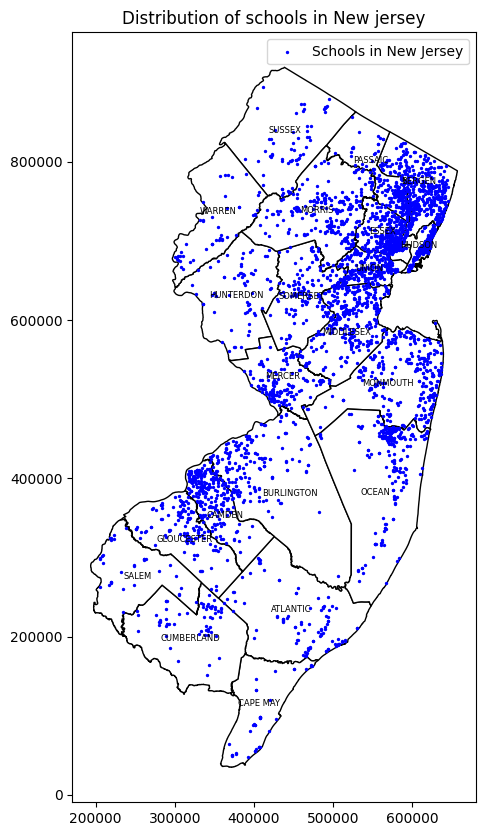

In [ ]:
# Plot New Jersey counties
ax = nj_counties.plot(color='white', edgecolor='black', figsize=(15, 10))

# Plot college and university points on top of counties
new_jersey_schools.plot(ax=ax, color='blue', marker='o', markersize=2, label='Schools in New Jersey')

# Annotate county names
for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['COUNTY']):
    ax.text(x, y, label, color = 'black' , fontsize=6, ha='center', va='center')

# Set plot title and show the plot
plt.title('Distribution of schools in New jersey')
plt.legend()  # Add this line to display the legend
plt.show()

Education is another fundamental factor that Parents in particular consider when moving into new boundaries. As the map indicates, many schools are located in North-Jersey counties such as Middlesex, Monmouth, Essex, Union, Hudson, and Bergen and also aroud the areas of Burlington and Camden. While proximity to schools is crucial, those coming into New Jersey should also be aware of other related factors like segregation in schools, drug and substance abuse, transport networks, and tuition fees, and housing costs which are critical determinants of academic success in New jersey.  

In [ ]:
import folium
import json
import requests

# URL to the raw GeoJSON file on GitHub
geojson_url = "https://raw.githubusercontent.com/Brian13Noble/GIS/ff2d2b7e1ef21b0adf2d80f370bee004c4da830c/County_Boundaries_of_NJ.geojson"

# Download the GeoJSON data
response = requests.get(geojson_url)
geojson_data = response.json()

# Center coordinates of New Jersey
nj_center = [40.0583, -74.4057]

# Create a map centered on New Jersey
nj_map = folium.Map(location=nj_center, zoom_start=9)

# Add GeoJSON data to the map
folium.GeoJson(geojson_data).add_to(nj_map)

# Display the map
nj_map




In [ ]:
file_path = '/content/New Jersey Population.xlsx'

 #Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/New%20Jersey%20Population.xlsx

# Now read the Excel file into a DataFrame
nj_popul = pd.read_excel(file_path)

In [ ]:
# blacks_Asians.dropna(axis=1, how='all')

In [ ]:
nj_popul['County'] = nj_popul['County'].str.rstrip().str.upper()


In [ ]:
nj_popul

County  Black/African American(%)  Asian Alone(%)  White(%)  \
0     ATLANTIC                       17.1             8.3      71.1   
1       BERGEN                        7.3            16.9      73.0   
2   BURLINGTON                       18.2             5.3      73.1   
3       CAMDEN                       21.6             6.0      69.2   
4     CAPE MAY                        4.9             1.0      91.8   
5   CUMBERLAND                       21.9             1.5      71.9   
6        ESSEX                       41.9             5.8      49.0   
7   GLOUCESTER                       11.2             3.1      83.1   
8       HUDSON                       14.8            16.4      64.7   
9    HUNTERDON                        2.9             4.2      91.0   
10      MERCER                       21.5            11.6      63.6   
11   MIDDLESEX                       11.7            25.1      60.3   
12    MONMOUTH                        7.6             5.7      84.6   
13      MORRIS                        3.8            10.7      83.2   
14       OCEAN                        3.5             1.9      92.8   
15     PASSAIC                       15.0             5.8      74.7   
16       SALEM                       14.7             1.1      81.3   
17    SOMERSET                       10.4            18.6      68.6   
18      SUSSEX                        2.5             2.0      93.5   
19       UNION                       23.7             5.7      67.6   
20      WARREN                        5.4             3.0      89.5   

    Hispanic/Latino(%)  Two or More Races  
0                 19.2                2.7  
1                 20.6                2.2  
2                  8.3                2.9  
3                 17.2                2.5  
4                  7.9                1.9  
5                 31.4                3.0  
6                 23.5                2.4  
7                  6.4                2.2  
8                 42.9                2.7  
9                  6.8                1.4  
10                18.1                2.4  
11                21.6                2.2  
12                11.1                1.8  
13                13.7                1.9  
14                 9.5                1.4  
15                42.3                2.8  
16                 9.5                2.3  
17                15.0                2.1  
18                 8.6                1.7  
19                32.3                2.2  
20                 9.7                1.7

In [ ]:
nj_popul.dtypes

County                        object
Black/African American(%)    float64
Asian Alone(%)               float64
White(%)                     float64
Hispanic/Latino(%)           float64
Two or More Races            float64
dtype: object

In [ ]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

# The Concept of Race Across New jersey Counties

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'nj_popul' is your DataFrame
# Make sure column names match your actual data
fig = px.scatter(nj_popul, x="Black/African American(%)", y="Asian Alone(%)",
                 color="White(%)",
                 hover_data=['County'], width=1000, height=600)

# Show the plot
fig.show()





In the previous ps, there was an interesting finding that Asians have a higher life expectancy in New Jersey compared to other ethnic groups. The finding inspired me to explore further to understand the percentage of different racial groups living in New Jersey and their distribution across counties. The scatter plot indicates that majority of the Asians live in Somerset and Middlesex counties while very few Asians live in Cape May, Salem and Cumberland. Moreover, it is worth noting that Black Americans are among the majority of the residents of Essex county. Racial discrimination is a common problem in New jersey and therefore, one should consider such factors before settling.

In [ ]:
nj_popul.dtypes

County                        object
Black/African American(%)    float64
Asian Alone(%)               float64
White(%)                     float64
Hispanic/Latino(%)           float64
Two or More Races            float64
dtype: object

In [ ]:
import folium
import pandas as pd
import json
import requests

# Assuming you have already loaded 'New Jersey Population' DataFrame
# You can also replace this with your actual DataFrame loading code

# Load GeoJSON data for New Jersey counties
geojson_url = "https://raw.githubusercontent.com/Brian13Noble/GIS/ff2d2b7e1ef21b0adf2d80f370bee004c4da830c/County_Boundaries_of_NJ.geojson"
response = requests.get(geojson_url)
nj_geojson_data = response.json()

# Normalize GeoJSON features into a DataFrame
geojson_df = pd.json_normalize(nj_geojson_data['features'])

# Merge DataFrame with GeoJSON data on the county name
merged_df = pd.merge(nj_popul, geojson_df, left_on='County', right_on='properties.COUNTY')

# Create a map centered on New Jersey
nj_center = [40.0583, -74.4057]
nj_map = folium.Map(location=nj_center, zoom_start=9)

# Add Choropleth layer with Asian population data
folium.Choropleth(
    geo_data=nj_geojson_data,
    name='Asian_Population',
    data=merged_df,
    columns=['County', 'Asian Alone(%)'],
    key_on='properties.COUNTY',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Asian Population Percentage by County',
    highlight=True,
    smooth_factor=0.5,
    nan_fill_color='grey',
    nan_fill_opacity=0.4,
    reset=True,
    style_function=lambda x: {'fillColor': 'grey' if pd.isna(x['properties.COUNTY']) else 'YlOrRd', 'color': 'black'},
    tooltip=folium.features.GeoJsonTooltip(
        fields=['properties.COUNTY', 'Asian Alone(%)'],
        aliases=['County', 'Asian Population Percentage'],
        labels=True,
        sticky=True,
    )
).add_to(nj_map)

# Display the map
nj_map


The map shows that Majority of the Asians live in Somerset and Middlesex counties. It is important to note that they are among the densely populated counties and are generally performing well economically and are characterized by low levels of unemployment. Life expectancy is also higher in the counties implying a higher quality of life. It will be important to explore other factors like religion, culture, food preferences, and health insurance to better understand the reason behind the higher life expectancy among the Asians in New jersey.



# **Resources**
1. https://www.njoag.gov/programs/nj-cares/nj-cares-suspected-overdose-deaths/
2. https://www.americanimmigrationcouncil.org/sites/default/files/research/immigrants_in_new_jersey.pdf
3. https://www.indexmundi.com/facts/united-states/quick-facts/new-jersey/multiple-race-population-percentage#table
4. https://njogis-newjersey.opendata.arcgis.com/datasets/newjersey::county-boundaries-of-nj/explore
5. https://koordinates.com/layer/97263-new-jersey-schools/
6. https://njogis-newjersey.opendata.arcgis.com/datasets/newjersey::colleges-and-universities-in-nj/about
